### Importando as Bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

### Importando os Dados

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample = pd.read_csv('sample_submission.csv')

train.head()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


### Limpeza e Tratamento de Valores Nulos

In [4]:
train.isnull().sum()


id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

In [5]:
age_cols = [
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year'
]

for col in age_cols:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

train.isnull().sum()
test.isnull().sum()

id                          0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
dtype: int64

### Codificação de Variáveis Categóricas

In [6]:
train['category_code'].unique()

array(['enterprise', 'advertising', 'photo_video', 'web', 'software',
       'games_video', 'mobile', 'sports', 'fashion', 'semiconductor',
       'security', 'biotech', 'hardware', 'public_relations', 'ecommerce',
       'other', 'social', 'cleantech', 'manufacturing', 'automotive',
       'network_hosting', 'messaging', 'music', 'travel', 'consulting',
       'search', 'finance', 'medical', 'analytics', 'real_estate',
       'education', 'health', 'news', 'transportation'], dtype=object)

In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(train[['category_code']])

train_cat_encoded = ohe.transform(train[['category_code']])
test_cat_encoded = ohe.transform(test[['category_code']])

cols_encoded = ohe.get_feature_names_out(['category_code'])
train_cat_df = pd.DataFrame(train_cat_encoded, columns=cols_encoded, index=train.index)
test_cat_df = pd.DataFrame(test_cat_encoded, columns=cols_encoded, index=test.index)

train = pd.concat([train.drop(columns=['category_code']), train_cat_df], axis=1)
test = pd.concat([test.drop(columns=['category_code']), test_cat_df], axis=1)


### Exploração e Visualização dos Dados

labels
1    0.647059
0    0.352941
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribuição das Classes'}, xlabel='labels'>

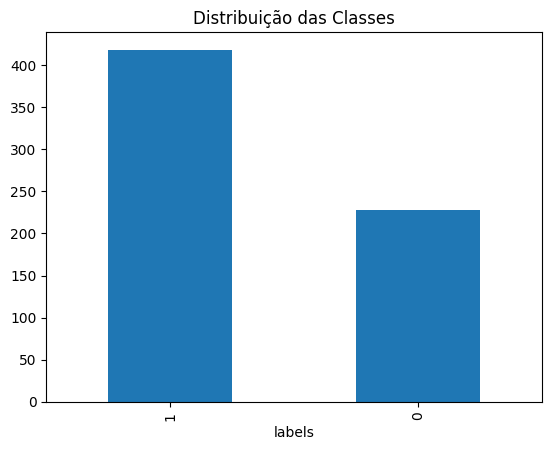

In [8]:
print(train['labels'].value_counts(normalize=True))
train['labels'].value_counts().plot(kind='bar', title='Distribuição das Classes')

In [9]:
train.describe()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,461.577399,2.214845,3.981471,2.636455,4.095093,7.948916,2.351393,2.949633e+07,1.913313,0.546440,...,0.003096,0.013932,0.018576,0.037152,0.015480,0.162539,0.001548,0.003096,0.006192,0.150155
std,264.859464,2.458298,2.968292,2.889983,3.468893,7.397602,1.357856,2.261999e+08,1.337095,0.498224,...,0.055598,0.117299,0.135126,0.189280,0.123547,0.369230,0.039344,0.055598,0.078506,0.357500
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,233.250000,0.550000,1.755000,0.000000,1.000000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,459.500000,1.435000,3.560000,2.000000,3.970000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,692.500000,3.390000,5.560000,4.000000,6.187500,10.000000,3.000000,2.587500e+07,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,923.000000,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


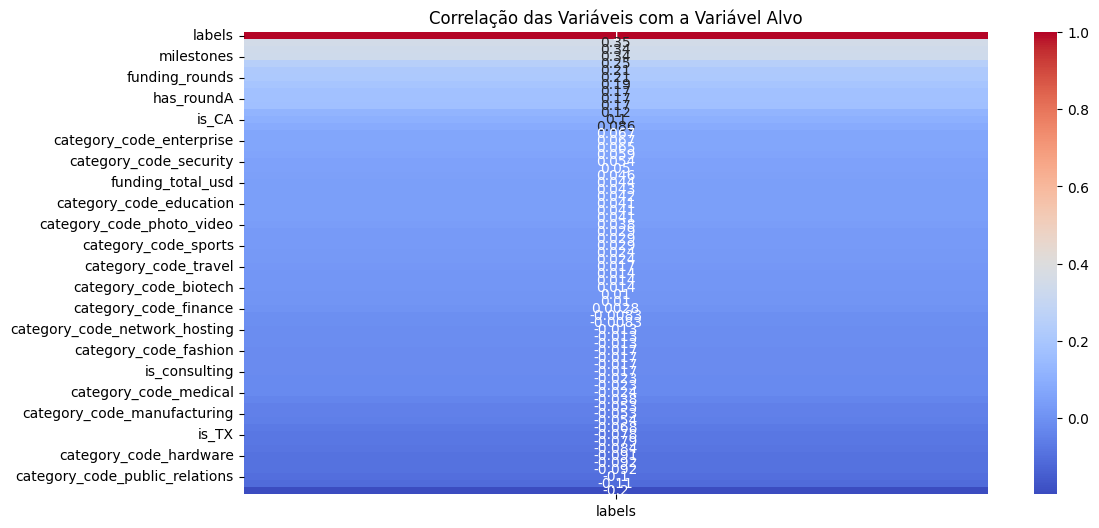

In [10]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr[['labels']].sort_values(by='labels', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis com a Variável Alvo')
plt.show()

### Formulação de Hipóteses

- Startups com mais rodadas de funding têm mais chances de sucesso

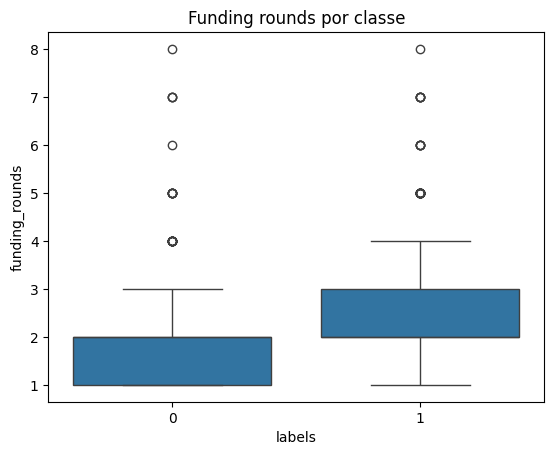

In [11]:
sns.boxplot(x='labels', y='funding_rounds', data=train)
plt.title('Funding rounds por classe')
plt.show()

- Startups com mais milestones registrados tendem a ter mais sucesso

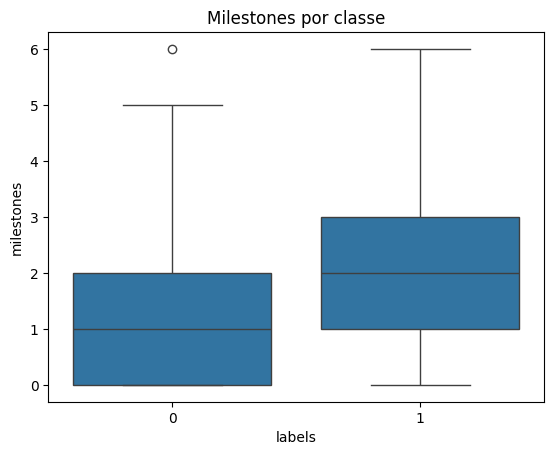

In [12]:
sns.boxplot(x='labels', y='milestones', data=train)
plt.title('Milestones por classe')
plt.show()

- Estar no estado da Califórnia aumenta as chances de sucesso

is_CA
0    0.593857
1    0.691218
Name: labels, dtype: float64


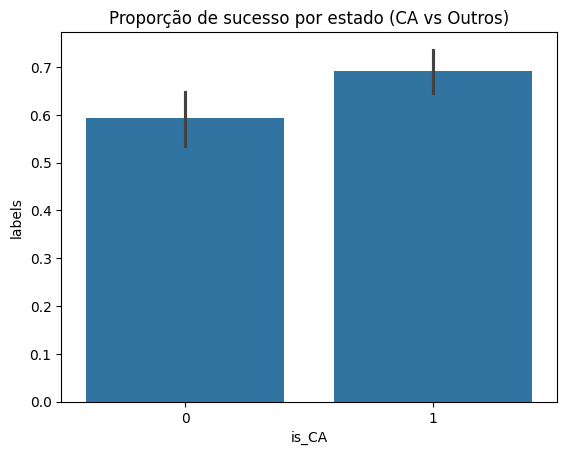

In [13]:
print(train.groupby('is_CA')['labels'].mean())

sns.barplot(x='is_CA', y='labels', data=train)
plt.title('Proporção de sucesso por estado (CA vs Outros)')
plt.show()

### Seleção de Features

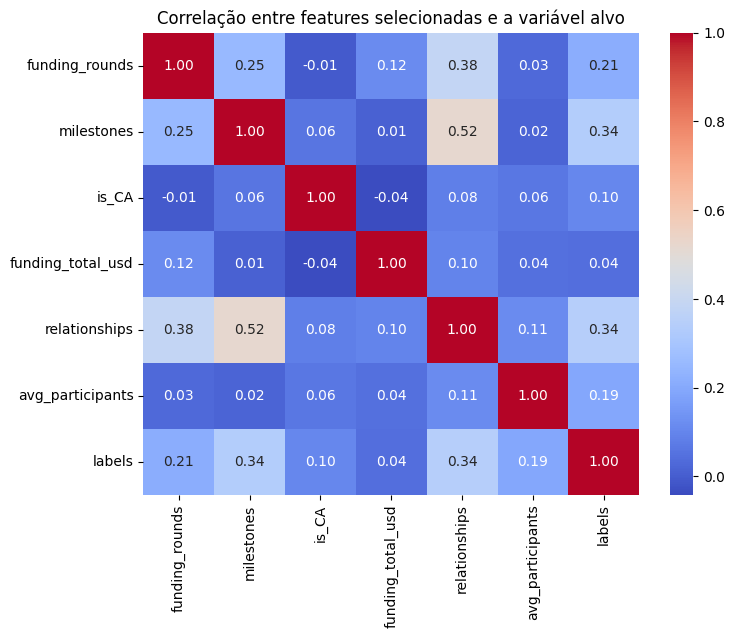

In [14]:
features_selecionadas = ['funding_rounds',
                        'milestones',
                        'is_CA',
                        'funding_total_usd',
                        'relationships',
                        'avg_participants',
                        'labels']

corr = train[features_selecionadas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre features selecionadas e a variável alvo')
plt.show()

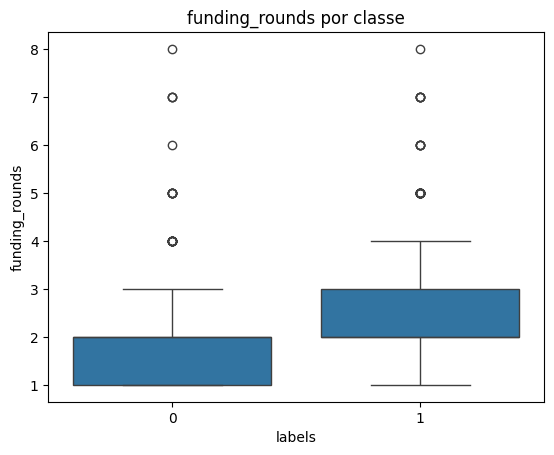

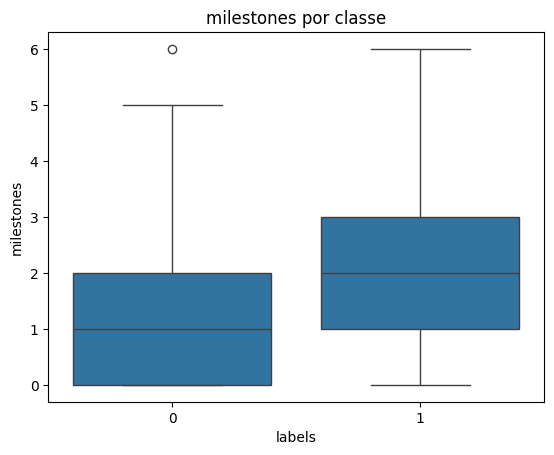

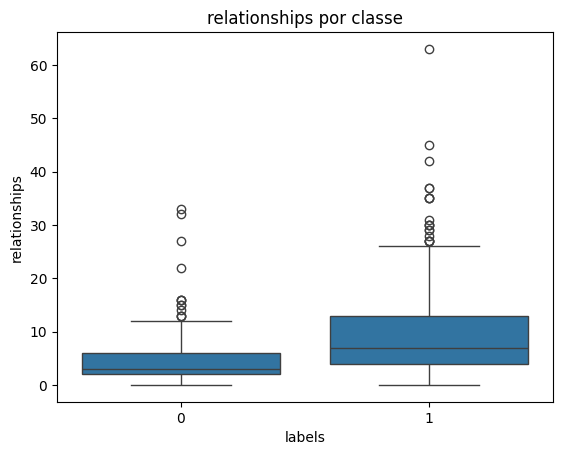

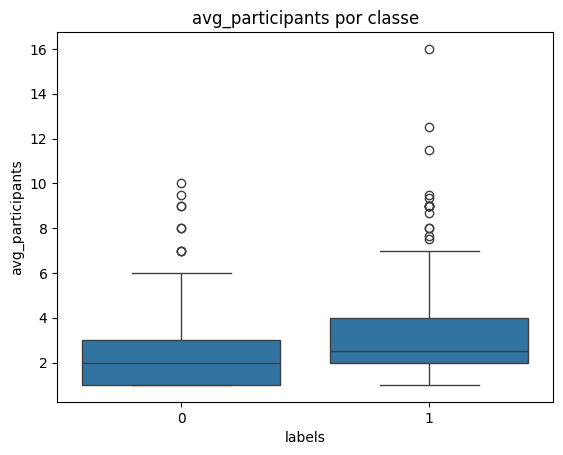

In [15]:
for col in ['funding_rounds', 'milestones', 'relationships', 'avg_participants']:
    sns.boxplot(x='labels', y=col, data=train)
    plt.title(f'{col} por classe')
    plt.show()

In [16]:
print(train.groupby('labels')[['funding_rounds',
                            'milestones',
                            'funding_total_usd',
                            'relationships',
                            'avg_participants',
                            'is_CA']].mean())

        funding_rounds  milestones  funding_total_usd  relationships  \
labels                                                                 
0             1.960526    1.307018       1.613087e+07       4.517544   
1             2.564593    2.244019       3.678658e+07       9.820574   

        avg_participants     is_CA  
labels                              
0               2.350282  0.478070  
1               3.120496  0.583732  


### Construção e Avaliação do Modelo

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X = train.drop(columns=['labels', 'id'])
y = train['labels']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier() 
}

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    print(f"{nome}: {scores.mean():.2f} + {scores.std():.2f}")

Logistic Regression: 0.66 + 0.02
Decision Tree: 0.68 + 0.04
Random Forest: 0.78 + 0.04
Gradient Boosting: 0.78 + 0.03
KNN: 0.69 + 0.04


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = train.drop(columns=['labels', 'id'])
y = train['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_val)

print("Acurácia:", accuracy_score(y_val, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_val, y_pred, digits=2))
print("Matriz de Confusão:\n", confusion_matrix(y_val, y_pred))

Acurácia: 0.7769230769230769

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.57      0.64        46
           1       0.79      0.89      0.84        84

    accuracy                           0.78       130
   macro avg       0.77      0.73      0.74       130
weighted avg       0.77      0.78      0.77       130

Matriz de Confusão:
 [[26 20]
 [ 9 75]]


### Finetuning de Hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X, y)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia média (CV):", grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Melhor acurácia média (CV): 0.8049016100178891


In [22]:
best_gb = grid.best_estimator_

best_gb.fit(X, y)

test_pred = best_gb.predict(test.drop(columns=['id']))

sample = pd.read_csv("sample_submission.csv")

sample['labels'] = test_pred

sample.to_csv("submission.csv", index=False)
print("Arquivo salvo: submission.csv")

Arquivo salvo: submission.csv
